In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 128us/step - loss: 2.6986 - accuracy: 0.5020 - val_loss: 1.8437 - val_accuracy: 0.6330
Epoch 2/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.5009 - accuracy: 0.6972 - val_loss: 1.3458 - val_accuracy: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.0919 - accuracy: 0.7702 - val_loss: 1.1469 - val_accuracy: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.8577 - accuracy: 0.8217 - val_loss: 1.0439 - val_accuracy: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.6842 - accuracy: 0.8603 - val_loss: 0.9754 - val_accuracy: 0.7910
Epoch 6/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.5507 - accuracy: 0.8900 - val_loss: 0.9374 - val_accuracy: 0.7930
Epoch 7/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.44

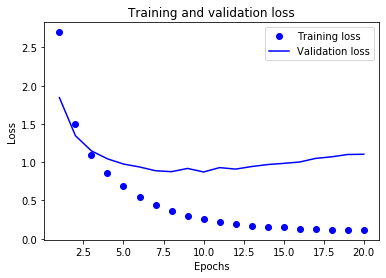

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

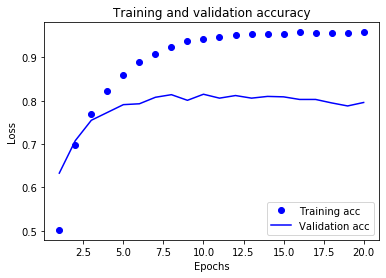

In [16]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 88us/step - loss: 2.4494 - accuracy: 0.5247 - val_loss: 1.6370 - val_accuracy: 0.6330
Epoch 2/8
7982/7982 [==============================] - 1s 80us/step - loss: 1.3822 - accuracy: 0.7086 - val_loss: 1.2678 - val_accuracy: 0.7070
Epoch 3/8
7982/7982 [==============================] - 1s 79us/step - loss: 1.0343 - accuracy: 0.7744 - val_loss: 1.1016 - val_accuracy: 0.7570
Epoch 4/8
7982/7982 [==============================] - 1s 79us/step - loss: 0.8072 - accuracy: 0.8261 - val_loss: 1.0226 - val_accuracy: 0.7720
Epoch 5/8
7982/7982 [==============================] - 1s 79us/step - loss: 0.6440 - accuracy: 0.8644 - val_loss: 0.9492 - val_accuracy: 0.8070
Epoch 6/8
7982/7982 [==============================] - 1s 79us/step - loss: 0.5109 - accuracy: 0.8938 - val_loss: 0.9069 - val_accuracy: 0.8190
Epoch 7/8
7982/7982 [==============================] - 1s 79us/step - loss: 0.4127 - acc

In [18]:
results

[0.9932572644200584, 0.7822796106338501]

In [19]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18833481745325023

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

0.99999994

In [23]:
np.argmax(predictions[0])

3

In [24]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [25]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 109us/step - loss: 2.9623 - accuracy: 0.2781 - val_loss: 2.1915 - val_accuracy: 0.5410
Epoch 2/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.6975 - accuracy: 0.5971 - val_loss: 1.5271 - val_accuracy: 0.6440
Epoch 3/20
7982/7982 [==============================] - 1s 101us/step - loss: 1.2888 - accuracy: 0.6897 - val_loss: 1.3744 - val_accuracy: 0.6900
Epoch 4/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.1183 - accuracy: 0.7296 - val_loss: 1.2993 - val_accuracy: 0.7050
Epoch 5/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.0010 - accuracy: 0.7486 - val_loss: 1.2837 - val_accuracy: 0.7150
Epoch 6/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.9114 - accuracy: 0.7681 - val_loss: 1.2768 - val_accuracy: 0.7130
Epoch 7/20
7982/7982 [==============================] - 1s 101us/step - loss: 